1- Gini’s maximum impurity is 0.5 and maximum purity is 0

2- Entropy’s maximum impurity is 1 and maximum purity is 0

3- Different decision tree algorithms utilize different impurity metrics: CART uses Gini; ID3 and C4.5 use Entropy. This is worth looking into before you use decision trees /random forests in your model.

# Gini Impurity

In [32]:
#Gini Function
#a and b are the quantities of each class
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

In [33]:
import random

In [34]:
#Blank lists
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []
#Looping Gini function on random blue and red float amounts
for x in range (10000):
 blue = random.uniform(0, 4)
 red = abs(4-blue)
 a = gini(red,blue)
 b = blue/(blue+red)
 gini_list.append(a)
 blue_list.append(blue)
 red_list.append(red)
 blue_prob_list.append(b)


In [35]:
import pandas as pd

In [36]:
#Dataframe of amount of blue, red, Probability of blue, and gini score
df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Gini Score": gini_list, "Probability of Blue": blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score']]
df

,Red,Blue,Probability of Blue,Gini Score
0,3.398165,0.601835,0.150459,0.255642
1,1.484089,2.515911,0.628978,0.466730
2,0.088875,3.911125,0.977781,0.043450
3,1.679418,2.320582,0.580146,0.487153
4,0.245333,3.754667,0.938667,0.115143
...,...,...,...,...
9995,1.838968,2.161032,0.540258,0.496759
9996,1.208394,2.791606,0.697901,0.421670
9997,0.741070,3.258930,0.814733,0.301887
9998,0.400898,3.599102,0.899775,0.180359


In [37]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")


Text(0.5, 1.0, 'Gini Curve')

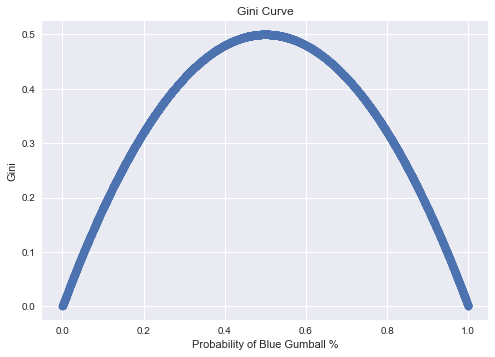

In [38]:
plt.scatter(blue_prob_list,gini_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Gini')
plt.title('Gini Curve')

# Entropy

In [39]:
#Entropy Function
#a and b are the quantities of each class. Base is the log base input.
def entropy(base,a,b):
    try:
        var =  abs(((a)/(a+b)) * log(((a)/(a+b)),base)) - (((b)/(a+b)) * log(((b)/(a+b)),base))
        return var
    except (ValueError):
        return 0


In [40]:
from math import log


In [41]:
#Blank lists
ent_list = []
ent_blue_list = []
ent_red_list = []
ent_blue_prob_list = []
#Loop with log base 2
for x in range (10000):
    blue = random.uniform(0, 4)
    red = abs(4-blue)
    a = entropy(2,red,blue)
    b = blue/(blue+red)
    ent_list.append(a)
    ent_blue_list.append(blue)
    ent_red_list.append(red)
    ent_blue_prob_list.append(b)

In [42]:
df = pd.DataFrame({"Blue": ent_blue_list, "Red": ent_red_list,"Entropy": ent_list, "Probability of Blue": ent_blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Entropy']]
df

,Red,Blue,Probability of Blue,Entropy
0,1.038945,2.961055,0.740264,0.826348
1,1.346895,2.653105,0.663276,0.921649
2,3.139446,0.860554,0.215138,0.751190
3,3.798768,0.201232,0.050308,0.287704
4,1.184125,2.815875,0.703969,0.876385
...,...,...,...,...
9995,2.737726,1.262274,0.315568,0.899497
9996,0.848999,3.151001,0.787750,0.745761
9997,2.560436,1.439564,0.359891,0.942593
9998,3.955348,0.044652,0.011163,0.088408


Text(0.5, 1.0, 'Entropy Curve')

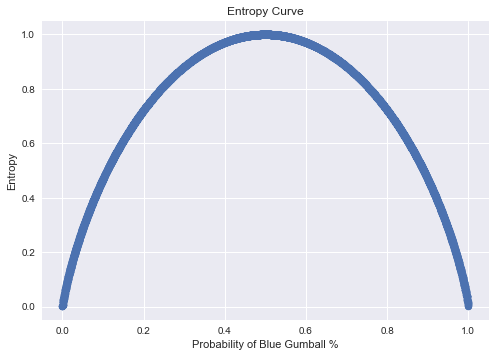

In [43]:
plt.scatter(ent_blue_prob_list,ent_list)
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

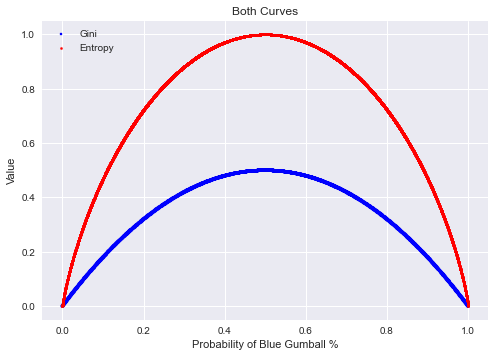

In [44]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(blue_prob_list,gini_list, s=5, c='b', marker="s", label='Gini')
ax1.scatter(ent_blue_prob_list,ent_list, s=5, c='r', marker="o", label='Entropy')
plt.legend(loc='upper left');
plt.xlabel('Probability of Blue Gumball %')
plt.ylabel('Value')
plt.title('Both Curves')
plt.show()

# Information Gain

Information gain is why impurity is so important. Once we derive the impurity of the dataset, we can see how much information is gained as we go down the tree and measure the impurity of the nodes.

In the example below, we are splitting gumball preference by a particular attribute (let’s say size of the gumball). It gives us the parent/child node relationship:

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "tree.png")

In [45]:
#Defining Gini info gain function:
def gini_info_gain(pa,pb,c1a,c1b,c2a,c2b):
    return (gini(pa,pb))-((((c1a+c1b)/(pa+pb))*gini(c1a,c1b)) + (((c2a+c2b)/(pa+pb))*gini(c2a,c2b)))


In [46]:
#Running Function
gini_info_gain(22,13,18,2,4,11)

0.1964625850340137

= 0.196 Gini Information gain

0.196/0.467 = 41.97% Gain

In [47]:
#Defining Entropy info gain function:
def entropy_info_gain(base,pa,pb,c1a,c1b,c2a,c2b):
    return (entropy(base,pa,pb))-((((c1a+c1b)/(pa+pb))*entropy(base,c1a,c1b)) + (((c2a+c2b)/(pa+pb))*entropy(base,c2a,c2b)))



In [48]:
#Running Function
entropy_info_gain(2,22,13,18,2,4,11)

0.3252048756090272